Commutativity

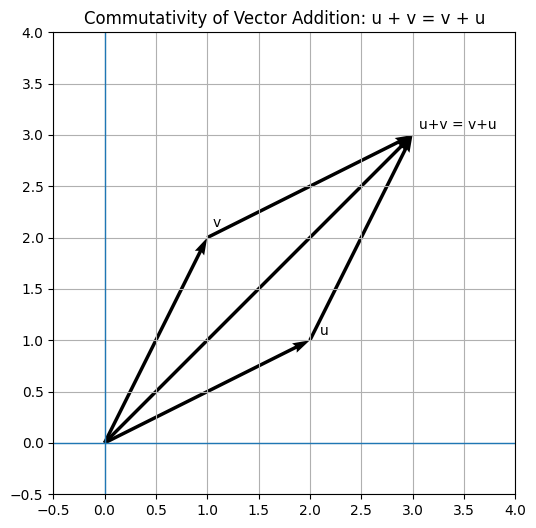

In [ ]:

import numpy as np
import matplotlib.pyplot as plt


u = np.array([2, 1])
v = np.array([1, 2])

plt.figure(figsize=(6,6))


plt.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, label="u")
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, label="v")

uv = u + v
plt.quiver(0, 0, uv[0], uv[1], angles='xy', scale_units='xy', scale=1, label="u+v")


plt.quiver(u[0], u[1], v[0], v[1], angles='xy', scale_units='xy', scale=1, label="u then v")


plt.quiver(v[0], v[1], u[0], u[1], angles='xy', scale_units='xy', scale=1, label="v then u")


plt.text(u[0]*1.05, u[1]*1.05, "u")
plt.text(v[0]*1.05, v[1]*1.05, "v")
plt.text(uv[0]*1.02, uv[1]*1.02, "u+v = v+u")

max_range = 4
plt.xlim(-0.5, max_range)
plt.ylim(-0.5, max_range)
plt.axhline(0, linewidth=1)
plt.axvline(0, linewidth=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Commutativity of Vector Addition: u + v = v + u")
plt.grid(True)
plt.show()


In [ ]:

#  Numerical verification
rng = np.random.default_rng(0)

def check_commutativity(dim=5, trials=5):
    max_diff = 0.0
    for _ in range(trials):
        u = rng.normal(size=dim)
        v = rng.normal(size=dim)

        left = u + v
        right = v + u
        diff = np.linalg.norm(left - right)
        print(' * '*30, ' \n \n  Dimension ', dim )
        print( 'u ', u )
        print( 'v ', v )
        print( 'u+v ', left )
        print( 'v+u ', right )
        print( 'diff ', diff)
        if diff > max_diff:
            max_diff = diff
    return max_diff

dims = [2, 3, 10, 100]
results = {d: check_commutativity(dim=d, trials=1) for d in dims}

print("Numerical check: max ||(u+v) - (v+u)|| over 10 random trials per dimension")
for d, md in results.items():
    print(f"  dim={d:>3}: max difference ≈ {md:.3e}")

print("\nInterpretation: Differences are ~ 0 up to floating-point rounding, confirming commutativity.")


 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *   
 
  Dimension  2
u  [ 0.12573022 -0.13210486]
v  [0.64042265 0.10490012]
u+v  [ 0.76615287 -0.02720475]
v+u  [ 0.76615287 -0.02720475]
diff  0.0
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *   
 
  Dimension  3
u  [-0.53566937  0.36159505  1.30400005]
v  [ 0.94708096 -0.70373524 -1.26542147]
u+v  [ 0.41141159 -0.34214018  0.03857857]
v+u  [ 0.41141159 -0.34214018  0.03857857]
diff  0.0
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *   
 
  Dimension  10
u  [-0.62327446  0.04132598 -2.32503077 -0.21879166 -1.24591095 -0.73226735
 -0.54425898 -0.31630016  0.41163054  1.04251337]
v  [-0.12853466  1.36646347 -0.66519467  0.35151007  0.90347018  0.0940123
 -0.74349925 -0.92172538 -0.45772583  0.22019512]
u+v  [-0.75180913  1.40778945 -2.99022545  0.13271841 -0.34244077 -0.63825506
 -1.28775823 -1.23802553 -0.046095

The  below line is a classic example of a 1-dimensional subspace of $\mathbb{R}^2$


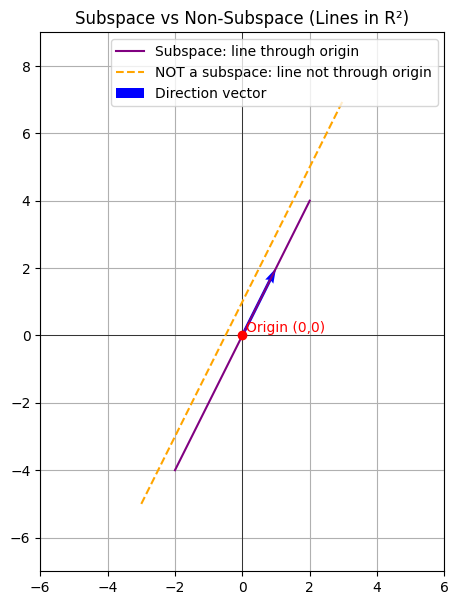

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#  Subspace line (through origin)
direction = np.array([1, 2])
t = np.linspace(-2, 2, 100)
line_points = np.outer(t, direction)

# Non-subspace line (not through origin)
x_vals = np.linspace(-3, 3, 100)
y_vals = 2 * x_vals + 1


plt.figure(figsize=(7,7))


plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)


plt.plot(line_points[:,0], line_points[:,1], color="purple", label="Subspace: line through origin")

plt.plot(x_vals, y_vals, color="orange", linestyle="--", label="NOT a subspace: line not through origin")

plt.scatter(0, 0, color="red", zorder=5)
plt.text(0.1, 0.1, "Origin (0,0)", color="red")

plt.quiver(0, 0, direction[0], direction[1], angles='xy', scale_units='xy', scale=1, color="blue", label="Direction vector")

plt.xlim(-6, 6)
plt.ylim(-7, 9)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.legend()
plt.title("Subspace vs Non-Subspace (Lines in R²)")
plt.show()


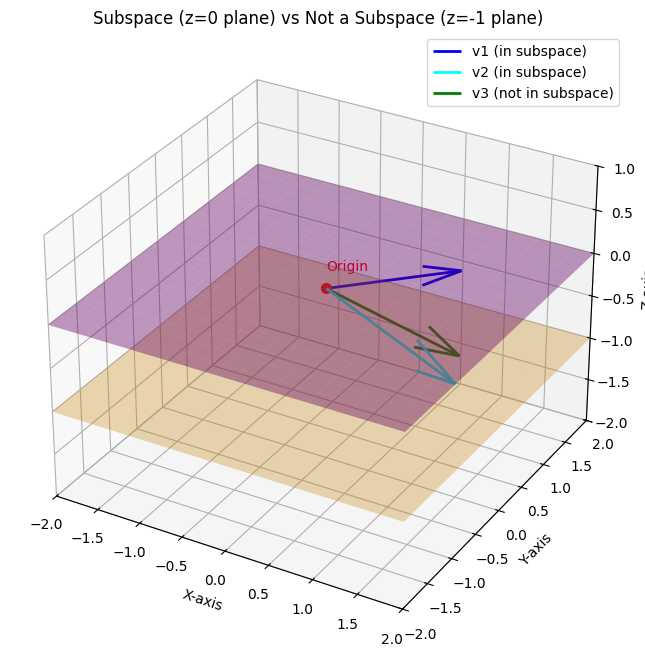

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')


x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)
Z_sub = np.zeros_like(X)
ax.plot_surface(X, Y, Z_sub, alpha=0.4, color="purple")
subspace_proxy = plt.Rectangle((0,0),1,1,fc="purple",alpha=0.4)

v1 = np.array([1, 1, 0])
v2 = np.array([2, -1, 0])
ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], color="blue", linewidth=2, label="v1 (in subspace)")
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], color="cyan", linewidth=2, label="v2 (in subspace)")


Z_non = -1 * np.ones_like(X)
ax.plot_surface(X, Y, Z_non, alpha=0.3, color="orange")
non_proxy = plt.Rectangle((0,0),1,1,fc="orange",alpha=0.3)


v3 = np.array([1, 1, -1])  # Lies in z=-1 plane
ax.quiver(0, 0, 0, v3[0], v3[1], v3[2], color="green", linewidth=2, label="v3 (not in subspace)")


ax.scatter(0,0,0, color="red", s=50)
ax.text(0,0,0.2,"Origin", color="red")


ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-2,1)
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("Subspace (z=0 plane) vs Not a Subspace (z=-1 plane)")

ax.legend()
plt.show()


Span {(1,0,1),(0,1,1)} in $\mathbb{R}^3$.



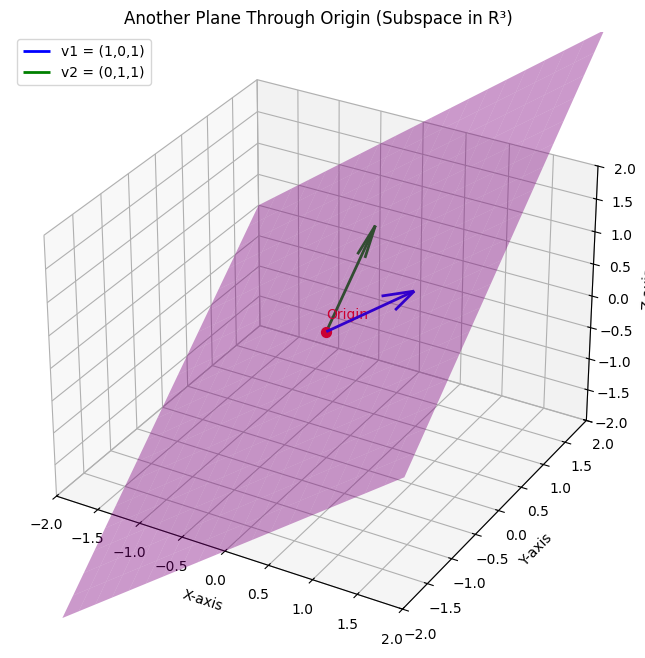

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')


v1 = np.array([1, 0, 1])
v2 = np.array([0, 1, 1])


a = np.linspace(-2, 2, 20)
b = np.linspace(-2, 2, 20)
A, B = np.meshgrid(a, b)
X = A * v1[0] + B * v2[0]
Y = A * v1[1] + B * v2[1]
Z = A * v1[2] + B * v2[2]


ax.plot_surface(X, Y, Z, alpha=0.4, color="purple")
subspace_proxy = plt.Rectangle((0,0),1,1,fc="purple",alpha=0.4)


ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], color="blue", linewidth=2, label="v1 = (1,0,1)")
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], color="green", linewidth=2, label="v2 = (0,1,1)")

ax.scatter(0,0,0, color="red", s=50)
ax.text(0,0,0.2,"Origin", color="red")


ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("Another Plane Through Origin (Subspace in R³)")

ax.legend()
plt.show()


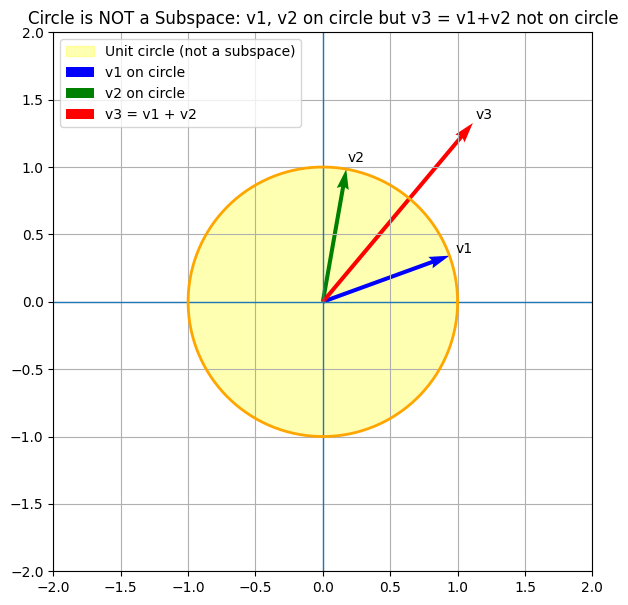

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Unit circle
theta = np.linspace(0, 2*np.pi, 400)
circle_x = np.cos(theta)
circle_y = np.sin(theta)

# Choose two vectors on the circle
a1 = np.deg2rad(20)
a2 = np.deg2rad(80)
v1 = np.array([np.cos(a1), np.sin(a1)])
v2 = np.array([np.cos(a2), np.sin(a2)])
v3 = v1 + v2


plt.figure(figsize=(7,7))


plt.axhline(0, linewidth=1)
plt.axvline(0, linewidth=1)


plt.fill(circle_x, circle_y, color="yellow", alpha=0.3, label="Unit circle (not a subspace)")


plt.plot(circle_x, circle_y, color="orange", linewidth=2)


plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, linewidth=2, color="blue", label="v1 on circle")
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, linewidth=2, color="green", label="v2 on circle")
plt.quiver(0, 0, v3[0], v3[1], angles='xy', scale_units='xy', scale=1, linewidth=2, color="red", linestyle='dashed', label="v3 = v1 + v2")


plt.text(v1[0]*1.05, v1[1]*1.05, "v1")
plt.text(v2[0]*1.05, v2[1]*1.05, "v2")
plt.text(v3[0]*1.02, v3[1]*1.02, "v3")

plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.legend()

plt.title("Circle is NOT a Subspace: v1, v2 on circle but v3 = v1+v2 not on circle")
plt.show()


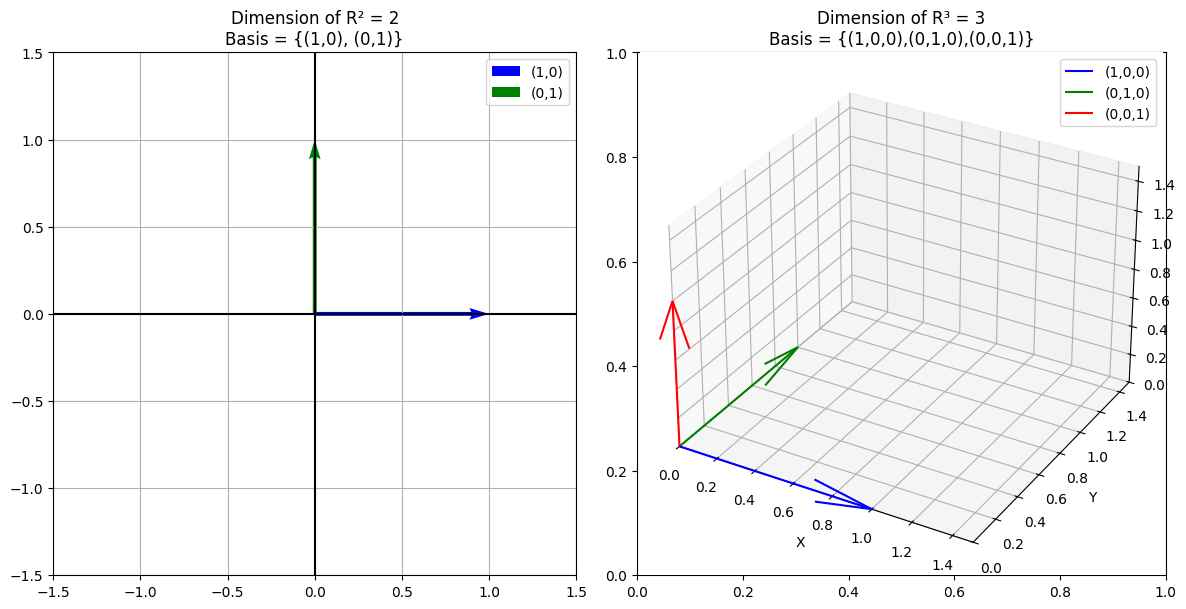

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


fig, axes = plt.subplots(1,2, figsize=(12,6))


v1 = np.array([1,0])
v2 = np.array([0,1])

axes[0].quiver(0,0,v1[0],v1[1],angles='xy',scale_units='xy',scale=1,color='blue',label='(1,0)')
axes[0].quiver(0,0,v2[0],v2[1],angles='xy',scale_units='xy',scale=1,color='green',label='(0,1)')
axes[0].set_xlim(-1.5,1.5)
axes[0].set_ylim(-1.5,1.5)
axes[0].axhline(0,color="black"); axes[0].axvline(0,color="black")
axes[0].set_aspect('equal')
axes[0].grid(True)
axes[0].set_title("Dimension of R² = 2\nBasis = {(1,0), (0,1)}")
axes[0].legend()

ax = fig.add_subplot(122, projection='3d')
v1 = np.array([1,0,0])
v2 = np.array([0,1,0])
v3 = np.array([0,0,1])

ax.quiver(0,0,0,v1[0],v1[1],v1[2],color='blue',label='(1,0,0)')
ax.quiver(0,0,0,v2[0],v2[1],v2[2],color='green',label='(0,1,0)')
ax.quiver(0,0,0,v3[0],v3[1],v3[2],color='red',label='(0,0,1)')
ax.set_xlim([0,1.5]); ax.set_ylim([0,1.5]); ax.set_zlim([0,1.5])
ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlabel("Z")
ax.set_title("Dimension of R³ = 3\nBasis = {(1,0,0),(0,1,0),(0,0,1)}")
ax.legend()

plt.tight_layout()
plt.show()


# Linear Transformation


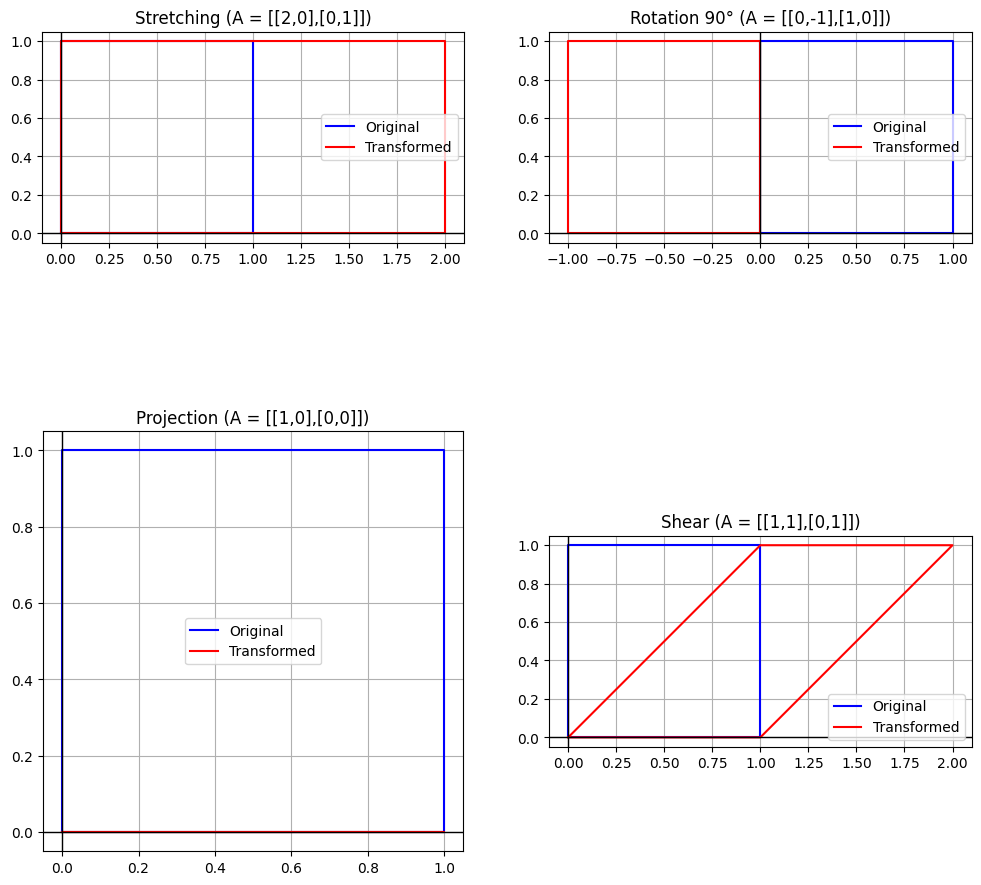

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

square = np.array([[0,0],[1,0],[1,1],[0,1],[0,0]])


A_stretch = np.array([[2,0],[0,1]])   # Stretch x by 2
A_rotate  = np.array([[0,-1],[1,0]])  # 90° rotation
A_project = np.array([[1,0],[0,0]])   # Projection onto x-axis
A_shear   = np.array([[1,1],[0,1]])   # Shear along x-axis


square_stretch = square @ A_stretch.T
square_rotate  = square @ A_rotate.T
square_project = square @ A_project.T
square_shear   = square @ A_shear.T


fig, axes = plt.subplots(2,2, figsize=(12,12))


axes[0,0].plot(square[:,0], square[:,1], 'b-', label="Original")
axes[0,0].plot(square_stretch[:,0], square_stretch[:,1], 'r-', label="Transformed")
axes[0,0].set_title("Stretching (A = [[2,0],[0,1]])")
axes[0,0].axhline(0,color="black",linewidth=1); axes[0,0].axvline(0,color="black",linewidth=1)
axes[0,0].set_aspect('equal'); axes[0,0].legend(); axes[0,0].grid(True)


axes[0,1].plot(square[:,0], square[:,1], 'b-', label="Original")
axes[0,1].plot(square_rotate[:,0], square_rotate[:,1], 'r-', label="Transformed")
axes[0,1].set_title("Rotation 90° (A = [[0,-1],[1,0]])")
axes[0,1].axhline(0,color="black",linewidth=1); axes[0,1].axvline(0,color="black",linewidth=1)
axes[0,1].set_aspect('equal'); axes[0,1].legend(); axes[0,1].grid(True)


axes[1,0].plot(square[:,0], square[:,1], 'b-', label="Original")
axes[1,0].plot(square_project[:,0], square_project[:,1], 'r-', label="Transformed")
axes[1,0].set_title("Projection (A = [[1,0],[0,0]])")
axes[1,0].axhline(0,color="black",linewidth=1); axes[1,0].axvline(0,color="black",linewidth=1)
axes[1,0].set_aspect('equal'); axes[1,0].legend(); axes[1,0].grid(True)


axes[1,1].plot(square[:,0], square[:,1], 'b-', label="Original")
axes[1,1].plot(square_shear[:,0], square_shear[:,1], 'r-', label="Transformed")
axes[1,1].set_title("Shear (A = [[1,1],[0,1]])")
axes[1,1].axhline(0,color="black",linewidth=1); axes[1,1].axvline(0,color="black",linewidth=1)
axes[1,1].set_aspect('equal'); axes[1,1].legend(); axes[1,1].grid(True)

plt.show()


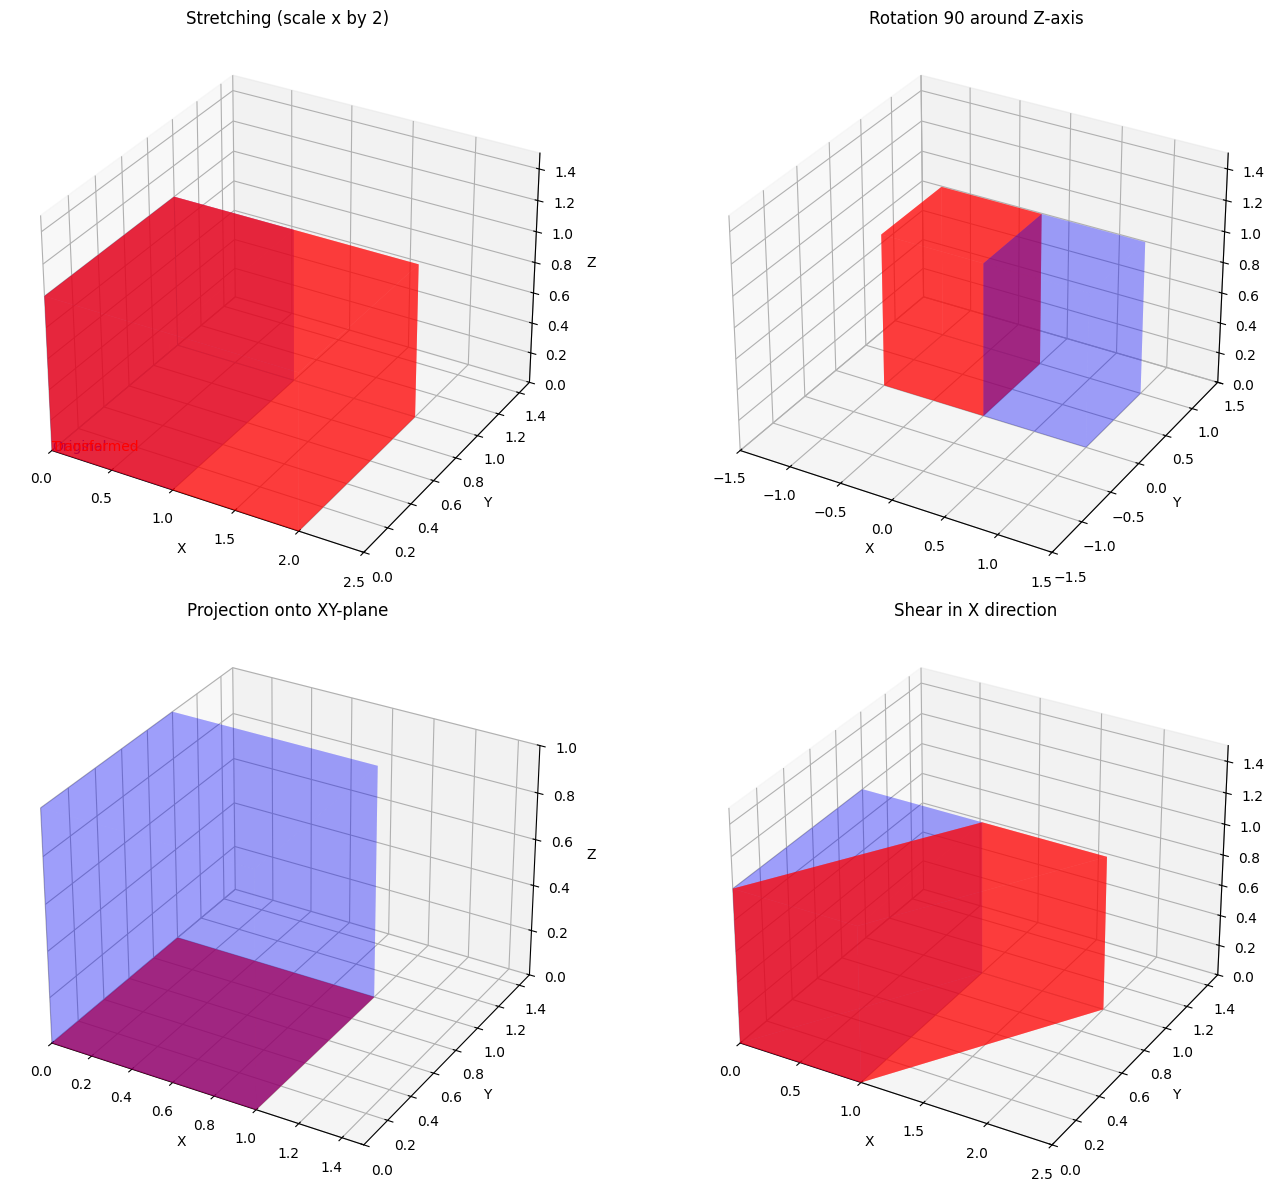

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Function to draw a cube given vertices
def draw_cube(ax, vertices, color='b', alpha=0.2, label=None):
    # Define the 6 faces of the cube
    faces = [
        [vertices[j] for j in [0,1,2,3]],
        [vertices[j] for j in [4,5,6,7]],
        [vertices[j] for j in [0,1,5,4]],
        [vertices[j] for j in [2,3,7,6]],
        [vertices[j] for j in [1,2,6,5]],
        [vertices[j] for j in [4,7,3,0]]
    ]
    cube = Poly3DCollection(faces, alpha=alpha, facecolor=color)
    ax.add_collection3d(cube)
    if label:
        ax.text(vertices[0,0], vertices[0,1], vertices[0,2], label, color=color)

cube_vertices = np.array([
    [0,0,0],[1,0,0],[1,1,0],[0,1,0],
    [0,0,1],[1,0,1],[1,1,1],[0,1,1]
])


A_stretch = np.array([[2,0,0],[0,1,0],[0,0,1]])          # Stretch x by 2
theta = np.pi/2
A_rotate  = np.array([[np.cos(theta),-np.sin(theta),0],  # Rotation around z-axis
                      [np.sin(theta), np.cos(theta),0],
                      [0,0,1]])
A_project = np.array([[1,0,0],[0,1,0],[0,0,0]])          # Projection onto xy-plane
A_shear   = np.array([[1,1,0],[0,1,0],[0,0,1]])          # Shear in x-direction

# Apply transformations
cube_stretch = cube_vertices @ A_stretch.T
cube_rotate  = cube_vertices @ A_rotate.T
cube_project = cube_vertices @ A_project.T
cube_shear   = cube_vertices @ A_shear.T

# Plot setup
fig = plt.figure(figsize=(15,12))


ax = fig.add_subplot(2,2,1, projection='3d')
draw_cube(ax, cube_vertices, color="blue", alpha=0.2, label="Original")
draw_cube(ax, cube_stretch, color="red", alpha=0.5, label="Transformed")
ax.set_title("Stretching (scale x by 2)")
ax.set_xlim(0,2.5); ax.set_ylim(0,1.5); ax.set_zlim(0,1.5)
ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlabel("Z")


ax = fig.add_subplot(2,2,2, projection='3d')
draw_cube(ax, cube_vertices, color="blue", alpha=0.2)
draw_cube(ax, cube_rotate, color="red", alpha=0.5)
ax.set_title("Rotation 90 around Z-axis")
ax.set_xlim(-1.5,1.5); ax.set_ylim(-1.5,1.5); ax.set_zlim(0,1.5)
ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlabel("Z")


ax = fig.add_subplot(2,2,3, projection='3d')
draw_cube(ax, cube_vertices, color="blue", alpha=0.2)
draw_cube(ax, cube_project, color="red", alpha=0.5)
ax.set_title("Projection onto XY-plane")
ax.set_xlim(0,1.5); ax.set_ylim(0,1.5); ax.set_zlim(0,1)
ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlabel("Z")


ax = fig.add_subplot(2,2,4, projection='3d')
draw_cube(ax, cube_vertices, color="blue", alpha=0.2)
draw_cube(ax, cube_shear, color="red", alpha=0.5)
ax.set_title("Shear in X direction")
ax.set_xlim(0,2.5); ax.set_ylim(0,1.5); ax.set_zlim(0,1.5)
ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlabel("Z")

plt.tight_layout()
plt.show()
